In [1]:
import pandas as pd

from matplotlib.pylab import plt

In [2]:
base_dir = '/home/mma6789/Stuff/Studies/sem3/ms_project' #@param {type: 'string'}

dataset = 'US-101' #@param ['I-80', 'US-101']
t_o = 5000 #@param [3000, 4000, 5000] -> observation horizon
t_p = [2000, 2500, 3000, 3500] # prediction horizon

methods = ['LSTM', 'HMM', 'LSTMHMM']
learning_rate = 0.0002

t_p_seconds = [horizon / 1000 for horizon in t_p]

In [3]:
## Load metrics
metrics = {}

for method in methods:
    metrics[method] = []
    for horizon in t_p:
        data = pd.read_json(f'{base_dir}/metrics/{method}/{dataset}/testing_{t_o}_{horizon}_{learning_rate}.json')
        metrics[method].append(data)
    metrics[method] = pd.concat(metrics[method], ignore_index=True)

metrics

{'LSTM':    test_acc   test_f1                                     test_class_acc
 0  0.950851  0.960449   [0.9734768616, 0.9499384334000001, 0.9784880148]
 1  0.961738  0.967563   [0.9709215309, 0.9614990461, 0.9620449264000001]
 2  0.961461  0.967351  [0.9569947655000001, 0.9614022409, 0.973207820...
 3  0.958860  0.965042         [0.9709457456, 0.9584930399, 0.9604933858],
 'HMM':    test_acc   test_f1                                    test_class_acc
 0  0.662407  0.768216        [0.7434247031, 0.6591718017, 0.7588608892]
 1  0.670262  0.772593  [0.7999786188, 0.6675470155000001, 0.6281951975]
 2  0.665856  0.767934  [0.7501796161000001, 0.6636370658, 0.6627443881]
 3  0.642921  0.750590  [0.6722996344000001, 0.6400005579, 0.7769038255],
 'LSTMHMM':    test_acc   test_f1                                     test_class_acc
 0  0.965055  0.970469         [0.9606037066, 0.9651535931, 0.9657856997]
 1  0.967686  0.972017         [0.9789394911, 0.9678768057, 0.9337722696]
 2  0.976390  0

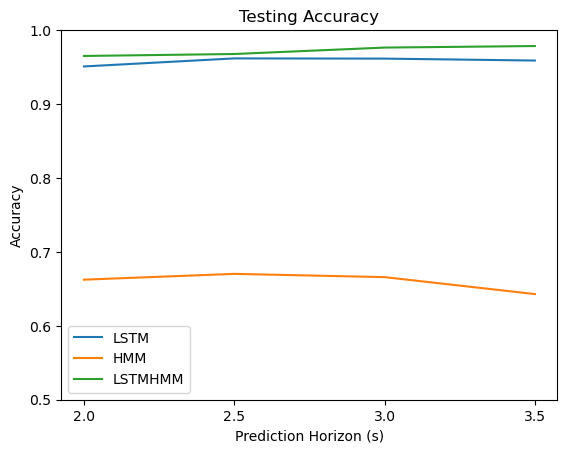

In [4]:
## Accuracy graph
plt.plot(t_p_seconds, metrics['LSTM']['test_acc'].tolist(), label='LSTM')
plt.plot(t_p_seconds, metrics['HMM']['test_acc'].tolist(), label='HMM')
plt.plot(t_p_seconds, metrics['LSTMHMM']['test_acc'].tolist(), label='LSTMHMM')
 
plt.title('Testing Accuracy')
plt.xlabel('Prediction Horizon (s)')
plt.ylabel('Accuracy')

plt.xticks(t_p_seconds)
plt.legend(loc='best')
plt.ylim(bottom=0.5, top=1)
plt.show()

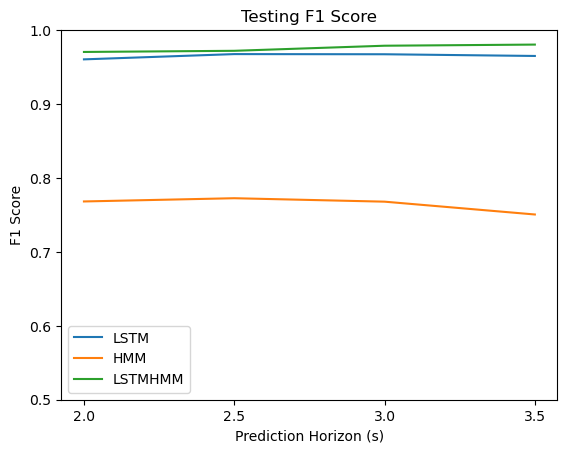

In [5]:
## F1 graph
plt.plot(t_p_seconds, metrics['LSTM']['test_f1'].tolist(), label='LSTM')
plt.plot(t_p_seconds, metrics['HMM']['test_f1'].tolist(), label='HMM')
plt.plot(t_p_seconds, metrics['LSTMHMM']['test_f1'].tolist(), label='LSTMHMM')
 
plt.title('Testing F1 Score')
plt.xlabel('Prediction Horizon (s)')
plt.ylabel('F1 Score')

plt.xticks(t_p_seconds)
plt.legend(loc='best')
plt.ylim(bottom=0.5, top=1)
plt.show()

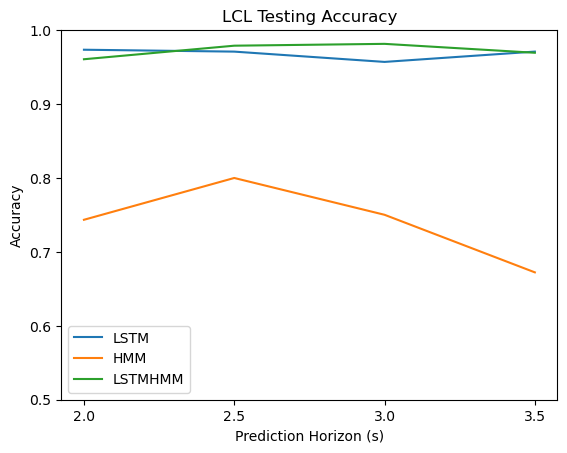

In [6]:
## Classwise accuracy graphs
plt.plot(t_p_seconds, [scores[0] for scores in metrics['LSTM']['test_class_acc']], label='LSTM')
plt.plot(t_p_seconds, [scores[0] for scores in metrics['HMM']['test_class_acc']], label='HMM')
plt.plot(t_p_seconds, [scores[0] for scores in metrics['LSTMHMM']['test_class_acc']], label='LSTMHMM')

plt.title('LCL Testing Accuracy')
plt.xlabel('Prediction Horizon (s)')
plt.ylabel('Accuracy')

plt.xticks(t_p_seconds)
plt.legend(loc='best')
plt.ylim(bottom=0.5, top=1)
plt.show()

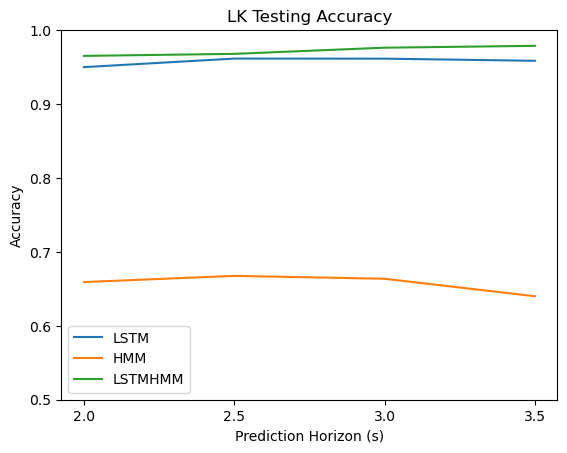

In [7]:
plt.plot(t_p_seconds, [scores[1] for scores in metrics['LSTM']['test_class_acc']], label='LSTM')
plt.plot(t_p_seconds, [scores[1] for scores in metrics['HMM']['test_class_acc']], label='HMM')
plt.plot(t_p_seconds, [scores[1] for scores in metrics['LSTMHMM']['test_class_acc']], label='LSTMHMM')

plt.title('LK Testing Accuracy')
plt.xlabel('Prediction Horizon (s)')
plt.ylabel('Accuracy')

plt.xticks(t_p_seconds)
plt.legend(loc='best')
plt.ylim(bottom=0.5, top=1)
plt.show()

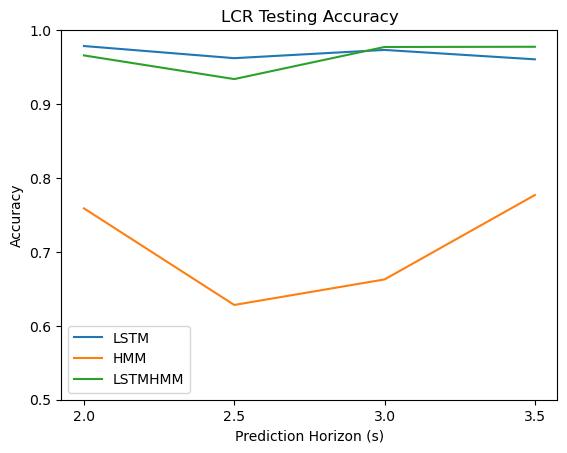

In [8]:
plt.plot(t_p_seconds, [scores[2] for scores in metrics['LSTM']['test_class_acc']], label='LSTM')
plt.plot(t_p_seconds, [scores[2] for scores in metrics['HMM']['test_class_acc']], label='HMM')
plt.plot(t_p_seconds, [scores[2] for scores in metrics['LSTMHMM']['test_class_acc']], label='LSTMHMM')

plt.title('LCR Testing Accuracy')
plt.xlabel('Prediction Horizon (s)')
plt.ylabel('Accuracy')

plt.xticks(t_p_seconds)
plt.legend(loc='best')
plt.ylim(bottom=0.5, top=1)
plt.show()